# TP2: Architectural Analysis


## Load an MTG file

In [1]:
from path import Path
# load MTG files
data = Path('data')

breaburn, fuji1, fuji2= data.glob('apple*.mtg')

In [2]:
s =!cat $breaburn
print '\n'.join(s[:90])

#Pommier Melgueil Braeburn 64				
CODE :	FORM-A			
CLASSES:				
SYMBOL	SCALE	DECOMPOSITION	INDEXATION	DEFINITION
$ 	0	FREE	FREE	IMPLICIT
P	1	FREE	FREE	EXPLICIT
R	2	PURELINEAR	FREE	IMPLICIT
M	2	PURELINEAR	FREE	IMPLICIT
S	2	PURELINEAR	FREE	IMPLICIT
I	3	FREE	FREE	EXPLICIT
U 	3	FREE	FREE	EXPLICIT
W	3	FREE	FREE	EXPLICIT
D 	3	FREE	FREE	EXPLICIT
E	4	FREE	FREE	EXPLICIT
F	4	FREE	FREE	EXPLICIT

DESCRIPTION :			
LEFT	RIGHT	RELTYPE	MAX
R	R,M,S	+	?
R	R,M,S	<	1
M	R,M,S	+	?
M	M,S	<	1
S	R,M,S	+	?
S	S	<	1
U	U,W,I,D	+	?
U	U,W,I,D	<	1
W	U,W,I,D	+	?
W	U,W,I,D	<	1
I	U,W,I,D	+	?
D	U,W,I,D	<	1
D	D, W	+	?
E	E,F	+	?
E	E,F	<	1


FEATURES:			
NAME	TYPE		
TopDia	REAL		
XX	REAL		
YY	REAL		
ZZ	REAL		
d98	REAL		
Nli98	INT		
x98	REAL		
y98	REAL		
z98	REAL		
d97	REAL		
rem	ALPHA		
Nli97	INT
x97	REAL
y97	REAL
z97	REAL
Nfruit	REAL
MS	REAL
fermete	REAL
IR	REAL
diam	REAL
hauteur	REAL
color	REAL
codeami	REAL
Poids	REAL
Densite	REAL
Hertz	REAL
Elson	REAL
lin	INT																																		

MTG:																							

## Load MTGs in memory

- Vertex identifier: vid
- MTG data structure : g


In [3]:
%matplotlib notebook
import pandas as pd

from openalea.mtg import *
gb = MTG(breaburn)
g1 = MTG(fuji1) 
g2 = MTG(fuji2) 

g = g2
#print g

NOT using graph editor observer No module named grapheditor


In [4]:
# Print the number of scales
nb_scales = g.nb_scales()

# Print the vertices at different scales
for scale in range(1, nb_scales):
    print 'Nb vertices at scale ', scale, ': ', g.nb_vertices(scale=scale)
    print 'Classes : ', list(set(g.class_name(vid) for vid in g.vertices(scale=scale)))
    print

Nb vertices at scale  1 :  1
Classes :  ['P']

Nb vertices at scale  2 :  1997
Classes :  ['S', 'R', 'M']

Nb vertices at scale  3 :  3900
Classes :  ['I', 'U', 'D', 'W']

Nb vertices at scale  4 :  12345
Classes :  ['E', 'F']



# Classes represent modularities
## Scale 1: P = Plant

## scale 2: Axes 
- S: Short 
- R : Long  
- M : Medium 

## scale 3 : Growth Unit
- I : Inflorescence
- U : Long GU
- D : Short GU
- W : Medium GU

## Scale 4: phytomer
- E: vegetative
- F: fruit

Fruit are not a modularity but we can encore specific attributes

In [5]:
# Select all the vertices of each classes

classes = list(set(g.class_name(vid) for vid in g.vertices() if g.class_name(vid)))
print classes

def vertices(g, class_name='P'):
    return [vid for vid in g.vertices() if g.class_name(vid)==class_name]

vids_E = vertices(g, 'E')
print 'Nb E', len(vids_E)

# Get the properties of one E vertex




['E', 'D', 'F', 'I', 'M', 'P', 'S', 'R', 'U', 'W']
Nb E 11871


# Get properties on the MTG and on each vertices

In [6]:
# Get one vertex
vid = vids_E[0]

# Properties on the MTG: this exclude all the topological properties
print g.property_names()

# Retrieve one property for the MTG (dict)
height = g.property('hauteur')
print height

# There are several methods to get all the properties of a given vertex (eg vid)
print g[vid]
node = g.node(vid)
print node.properties()

# get the label
print g[vid]['label']
print node.label
print node.index()

['y97', 'x97', 'x98', 'y98', 'YY', 'edge_type', 'Nfruit', 'Densite', '_line', 'index', 'SatR', 'diam', 'Nli98', 'SatV', 'TV', 'lin', 'TR', 'label', 'color', 'rem', 'TopDia', 'hauteur', 'd97', 'd98', 'IR', 'COVER', 'XX', 'ZZ', 'TransSOC', 'Poids', 'fermete', 'codeami', 'z97', 'MS', 'Nli97', 'z98']
{}
{'index': '1', 'scale': 4, 'complex': 3, 'vid': 4, 'parent': None, 'label': 'E1'}
{'index': 1, 'label': 'E1'}
E1
E1
1


## Compute at GU scale the number of growth unit by type and year

- the class of a vertex : g.class_name(v)
- the year is the encoded as the index: $label = class + index$
year = g.index(v) or node.index()

[0, 94, 95, 96, 97, 98, 99]
set(['I', 'U', 'D', 'W'])
{'I': {96: 30, 97: 166, 98: 140, 99: 1002, 0: 115, 94: 0, 95: 1}, 'U': {96: 29, 97: 46, 98: 39, 99: 15, 0: 0, 94: 1, 95: 7}, 'D': {96: 31, 97: 216, 98: 716, 99: 764, 0: 5, 94: 0, 95: 0}, 'W': {96: 38, 97: 77, 98: 170, 99: 291, 0: 0, 94: 0, 95: 1}}


<IPython.core.display.Javascript object>


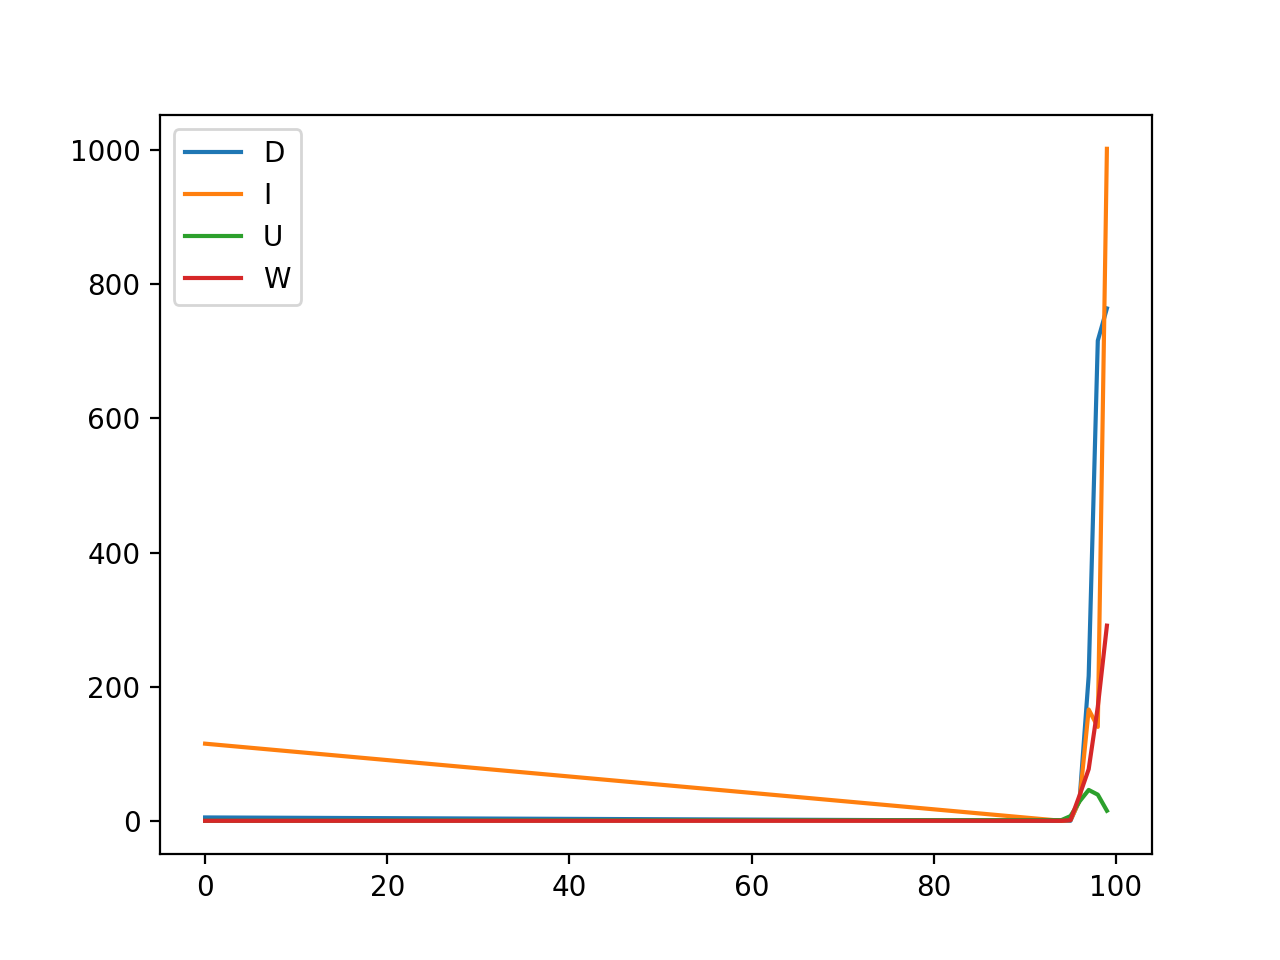

In [7]:

# Extract the years
years = set(int(g.index(vid)) for vid in g.vertices(scale=3))
print sorted(years)

classes = set(g.class_name(vid) for vid in g.vertices(scale=3))
print classes

d = {}

for c in classes:
    d[c] = {}
    for y in years:
        d[c][y] = 0
        
for vid in g.vertices(scale=3):
    _class = g.class_name(vid)
    _year = int(g.index(vid))
    d[_class][_year] += 1
    
print d

df = pd.DataFrame.from_dict(d)
df.plot()
#df

In [8]:
# Export to a pandas dataframe

# We need a dict with columns class, year and number

dd = datadict = {'class':[], 'year': [], 'number':[]}
for k in d:
    for y in d[k]:
        dd['class'].append(k)
        dd['year'].append(y)
        dd['number'].append(d[k][y])
        

df = pd.DataFrame(data=dd, index=None, columns=['class', 'year', 'number'])
df.sort_values(['class', 'year'])
df.to_csv('result_GU_num.csv', index=None)
#df

<IPython.core.display.Javascript object>


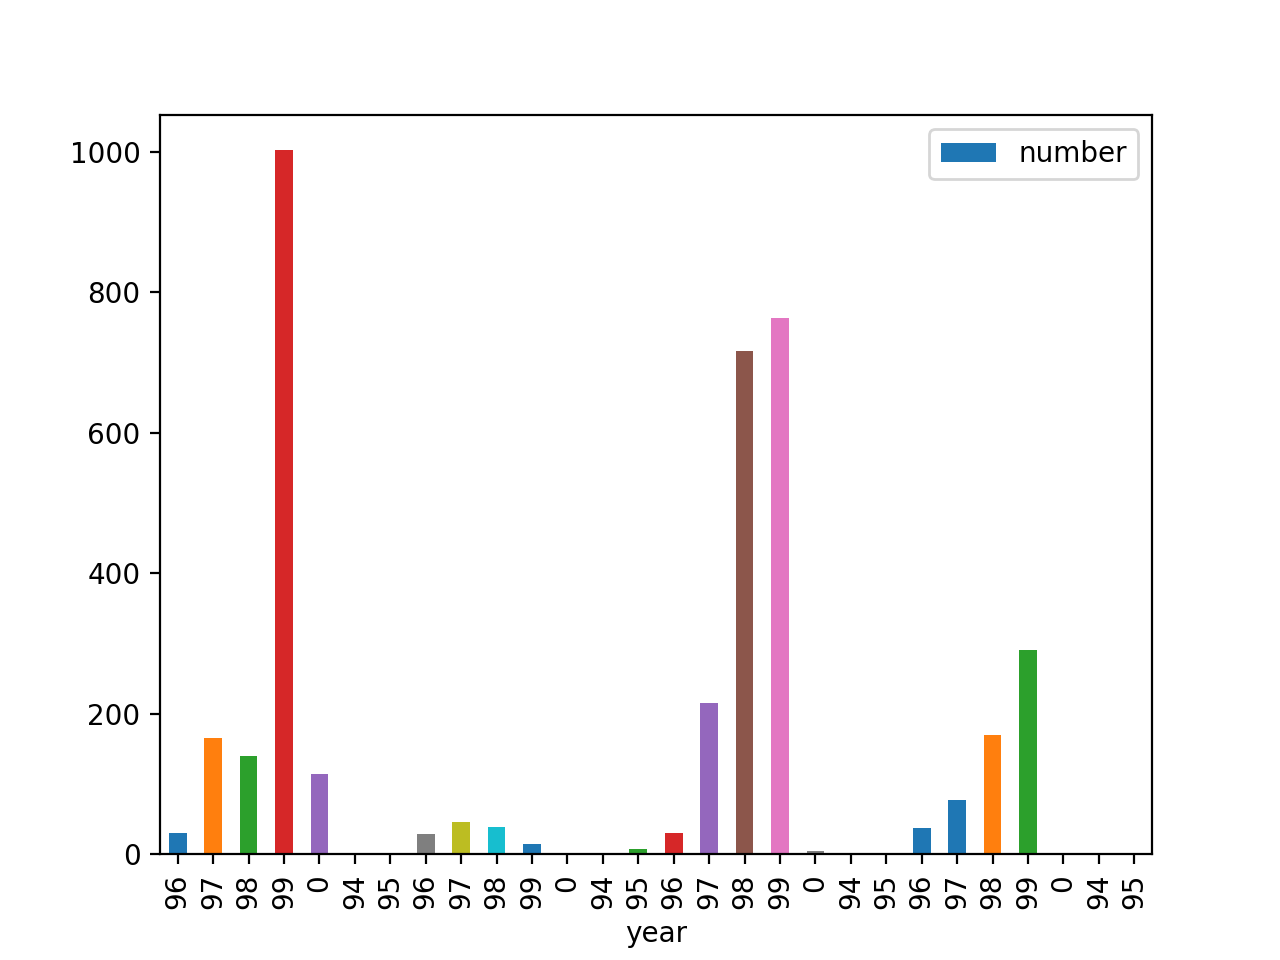

In [9]:

df.plot(x='year', y='number', by='class', kind='bar')

## Extract for each Growth Unit the number of metamer (components at scale 4)

In [10]:
GUs = g.vertices(scale=3)

nb_metamers = [(vid, g.class_name(vid), g.nb_components(vid)) for vid in GUs]

df_gu = pd.DataFrame(nb_metamers, columns=['vid', 'class', 'number'])

df_gu.to_csv('result_metamer_num.csv', index=None)
#df_gu

## Extract the number of ramification from each growth unit

In [11]:
# You can use the method Sons on MTG

nb_ramifs = [(vid, g.class_name(vid), len(g.Sons(vid, EdgeType='+'))) for vid in GUs]
df_ramif = pd.DataFrame(nb_ramifs, columns=['vid', 'class', 'number'])

df_ramif.to_csv('result_branch_num.csv', index=None)
#df_ramif

## For each vertex at scale Metamer (scale =4), population of ramifications and position

- vertex of the complex
- Class of complex
- year of complex
- position / rank of each metamer
- if no ramification, put B (blind) else the class of the complex of its child


In [12]:
def rank(v):
    cid = g.complex(v)
    root_in_complex = g.component_roots(cid)[0]
    return g.Height(root_in_complex, v)

ramif_location = []

for vid in g.vertices(scale=4):
    complex_id = g.complex(vid)
    c_class = g.class_name(complex_id)
    year = g.index(complex_id)
    metamer_rank = rank(vid)
    ramifs = g.Sons(vid, EdgeType='+')
    nb_ramifs = len(ramifs)
    # Class of the complex of the ramif
    ramif_class = g.class_name(g.complex(ramifs[0])) if (nb_ramifs != 0) else 'B' 
    
    ramif_location.append((complex_id, c_class, year, metamer_rank, nb_ramifs, ramif_class))
    
df_pop = pd.DataFrame(ramif_location, columns=['cid', 'class', 'year', 'metamer_rank', 'number_ramif', 'ramif_class'])
df_pop.to_csv('result_ramif_location.csv', index=None)
    
#df_pop

## For each vertex at scale Metamer (scale =4), population of ramifications and position

- vertex of the complex
- Class of complex
- year of complex
- position / rank of each metamer
- if no ramification, put B (blind) else the class of the complex of its child


In [13]:
ramif_location = []

for vid in g.vertices(scale=4):
    complex_id = g.complex(vid)
    c_class = g.class_name(complex_id)
    year = g.index(complex_id)
    metamer_rank = rank(vid)
    ramifs = g.Sons(vid, EdgeType='+')
    if ramifs and g.class_name(g.complex(ramifs[0])) == "I":
        ramifs_GU = g.Sons(g.complex(ramifs[0]),EdgeType="+")  
        nb_ramifs = len(ramifs_GU) 
        ramif_class = g.class_name(ramifs_GU[0]) if  (nb_ramifs != 0) else 'B' 
    else:
        nb_ramifs = len(ramifs)   ### ici on est à l'échelle 4 sur les métamères 
        ramif_class = g.class_name(g.complex(ramifs[0])) if (nb_ramifs != 0) else 'B' 
    
    ramif_location.append((complex_id, c_class, year, metamer_rank, nb_ramifs, ramif_class))
    
df_pop = pd.DataFrame(ramif_location, columns=['cid', 'class', 'year', 'metamer_rank', 'number_ramif', 'ramif_class'])
df_pop.to_csv('result_ramif_location_variant.csv', index=None)

## For each year, and each type  give the number of successor of each type

For all the Growth Unit of a given class and  year : 
- get the number of successor (its child whose edge_type is '<') of each type

There is a particular case for inflorescences:
- In case of inflo GrowthUnit (class I), the successor is a ramification (edge-type == '+') due to its sympodial nature.



In [14]:
# {'D', 'I', 'U', 'W'} with I : inflorescence
classes = set(g.class_name(vid) for vid in g.vertices(scale=3))


d = {}

for c in classes:
    d[c] = {}
    for y in years:
        d[c][y] = {}
        for sc in classes:
            d[c][y][sc] = 0

        
def my_successors(vid):
    if g.class_name(vid) != 'I':
        cid = g.Successor(vid)
        if cid is not None:
            return [cid]
        else:
            return []
    else:
        return g.children(vid)

for vid in GUs:
    _class = g.class_name(vid)
    _year = int(g.index(vid))
    kids = my_successors(vid)
    for cid in kids:
        s_class = g.class_name(cid)
        d[_class][_year][s_class] += 1

successors = []
for klass in d:
    for _year in d[klass]:
        data = [klass, _year]
        for succ_klass in classes:
            data.append(d[klass][_year][succ_klass])
        successors.append(data)

columns= ['class', 'year']+list(classes)

df_successors = pd.DataFrame(successors, columns=columns)
df_successors.to_csv('result_successors.csv', index=None)
#df_successors

## Plot the geometry of the Tree

Open an other notebook by clicking below:

[Plot the trees with PlantFrame Algorithm](3D_plot.ipynb)